In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
cd "/content/drive/MyDrive/ML/HW3"

/content/drive/MyDrive/ML/HW3


In [11]:
# import the necessary packages
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## attempt 1


In [12]:
# load the dataset into numpy array
array = np.loadtxt('datasets/Admission.csv', delimiter=',',skiprows=1)
# print(array)
acceptance = array[:, -1]
mean_acceptance = np.mean(acceptance)
acceptance = np.where(acceptance > mean_acceptance,1,0)

gre = array[:,1]
toefl = array[:,2]
rating = array[:,3]
sop = array[:,4]
lor = array[:,5]
cgpa = array[:,6]
research = array[:,7]

In [13]:
svm_linear = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
linear_svm =  make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
svm_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))
svm_poly = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))

In [14]:
feature1 = list()
for i in range(len(cgpa)):
  feature1.append([cgpa[i],sop[i]])
feature1 = np.array(feature1)

feature2 = list()
for i in range(len(cgpa)):
  feature2.append([cgpa[i],gre[i]])
feature2 = np.array(feature2)

feature3 = list()
for i in range(len(sop)):
  feature3.append([sop[i],lor[i]])
features3 = np.array(feature3)

feature4 = list()
for i in range(len(lor)):
  feature4.append([lor[i],gre[i]])
feature4 = np.array(feature4)

feature_selection = [feature1, feature2, feature3, feature4]
svm_models = [svm_linear, linear_svm, svm_rbf, svm_poly]

In [15]:
for feature in feature_selection:
  X_train, X_test, y_train, y_test = train_test_split(feature, acceptance, test_size=0.2, random_state=42)
  svm_linear.fit(X_train,y_train)
  linear_svm.fit(X_train,y_train)
  svm_rbf.fit(X_train,y_train)
  svm_poly.fit(X_train,y_train)

  accuracy_svm_linear = svm_linear.score(X_test,y_test)
  accuracy_linear_svm = linear_svm.score(X_test,y_test)
  accuracy_svm_rbf = svm_rbf.score(X_test,y_test)
  accuracy_svm_poly = svm_poly.score(X_test,y_test)

  print(accuracy_linear_svm,accuracy_svm_linear,accuracy_svm_poly,accuracy_svm_rbf)


0.875 0.8625 0.85 0.85
0.9125 0.9125 0.825 0.9125
0.8375 0.85 0.75 0.8125
0.9125 0.925 0.8625 0.925


## attempt 2


In [24]:
df = pd.read_csv("datasets/Admission.csv")
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [29]:
mean_chance_of_admit = df["Chance of Admit "].mean()
print(mean_chance_of_admit)
df["Admission"] = (df["Chance of Admit "] > mean_chance_of_admit).astype(int)
print(df["Admission"])

0.72435
0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Admission, Length: 400, dtype: int64


In [33]:
svm_linear = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
linear_svc =  make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
svm_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))
svm_poly = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))

In [35]:
feature_combinations = [
    ["CGPA", "SOP"],
    ["CGPA", "GRE Score"],
    ["SOP", "LOR "],
    ["LOR ", "GRE Score"]
]

for features in feature_combinations:
    X = df[features]
    y = df["Admission"]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train SVM models with the selected features
    svm_linear.fit(X_train, y_train)
    linear_svc.fit(X_train, y_train)
    svm_rbf.fit(X_train, y_train)
    svm_poly.fit(X_train, y_train)

In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

# List of SVM models
svm_models = [svm_linear, linear_svc, svm_rbf, svm_poly]

# List of feature combinations
feature_combinations = [
    ["CGPA", "SOP"],
    ["CGPA", "GRE Score"],
    ["SOP", "LOR "],
    ["LOR ", "GRE Score"]
]

# Visualize decision boundaries for each model and feature combination
for i, model in enumerate(svm_models):
    for j, features in enumerate(feature_combinations):
        X = df[features]
        y = df["Admission"]

        plt.figure(figsize=(8, 6))
        plot_decision_boundary(model, X, y, f"Model {i+1} with Features {features}")


In [52]:
print(list(enumerate(zip(svm_models, feature_combinations))))

[(0, (Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))]), ['CGPA', 'SOP'])), (1, (Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))]), ['CGPA', 'GRE Score'])), (2, (Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))]), ['SOP', 'LOR '])), (3, (Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='poly'))]), ['LOR ', 'GRE Score']))]


KeyError: ignored

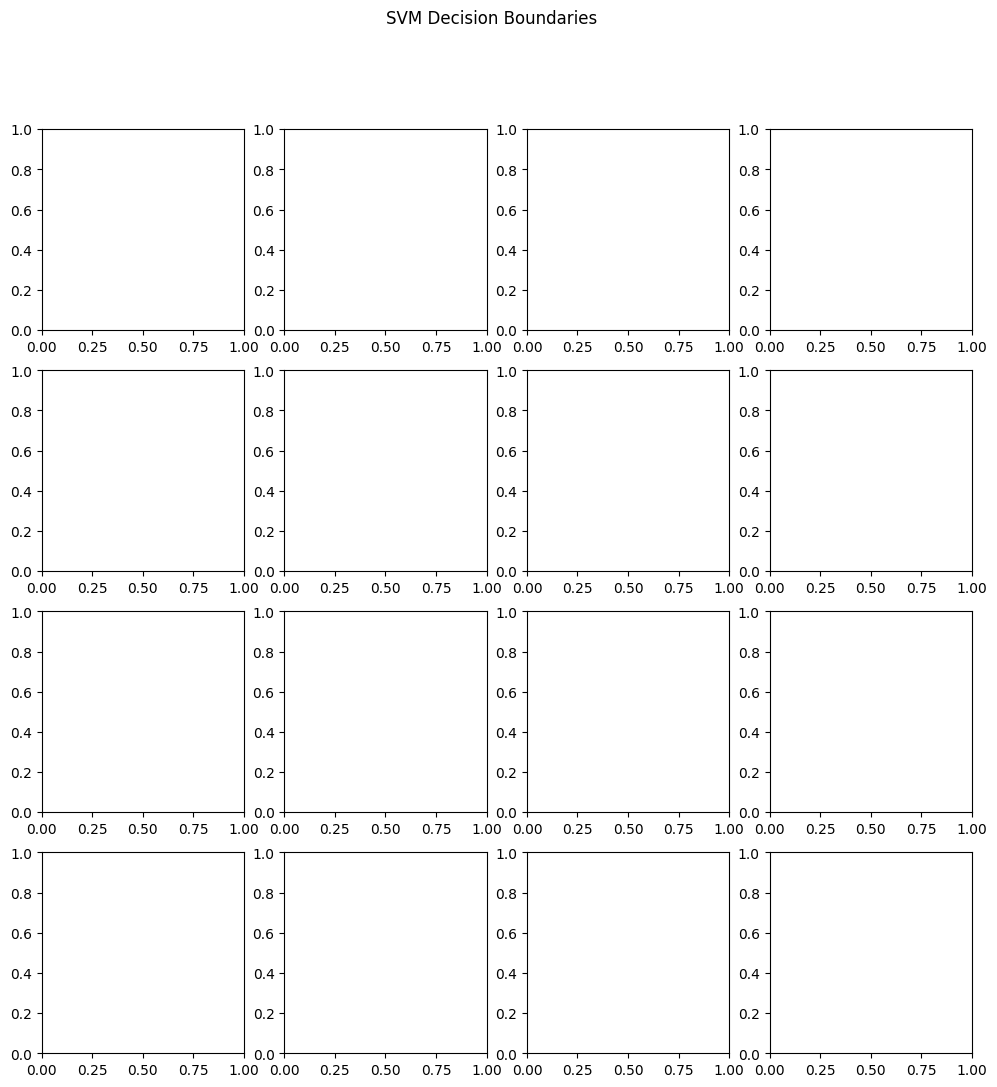

In [54]:
# Initialize subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("SVM Decision Boundaries")

for i, (model, features) in enumerate(zip(svm_models, feature_combinations)):
    X = df[features]
    y = df["Admission"]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_subset = X_train
    X_test_subset = X_test

    # Standardize the data for SVM
    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train_subset)
    # X_test_scaled = scaler.transform(X_test_subset)

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    test_accuracy = model.score(X_test, y_test)

    # Visualize the decision boundary
    ax = axes[i // 2, i % 2]
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20)
    ax.set_title(f"Features: {', '.join(features)}\nTest Accuracy: {test_accuracy:.2f}")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

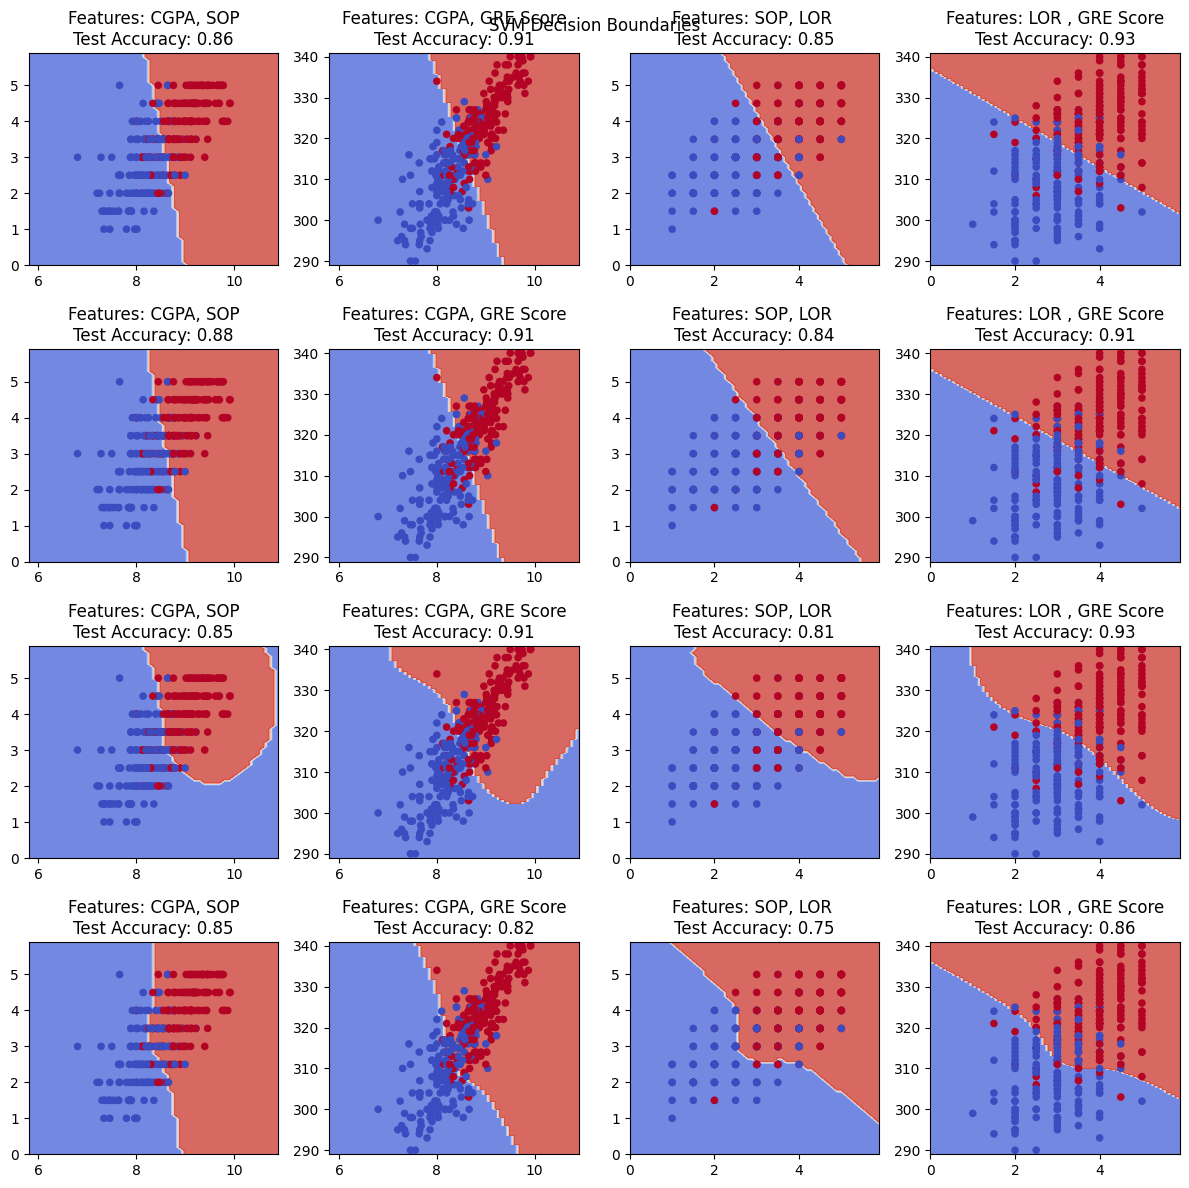

In [57]:
# Initialize subplots for visualization
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle("SVM Decision Boundaries")

for i, model in enumerate(svm_models):
    for j, features in enumerate(feature_combinations):
        X = df[features]
        y = df["Admission"]
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_subset = X_train
        X_test_subset = X_test

        # # Standardize the data for SVM
        # scaler = StandardScaler()
        # X_train_scaled = scaler.fit_transform(X_train_subset)
        # X_test_scaled = scaler.transform(X_test_subset)

        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model on the test set
        test_accuracy = model.score(X_test, y_test)

        # Visualize the decision boundary
        ax = axes[i, j]
        x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
        y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20)
        ax.set_title(f"Features: {', '.join(features)}\nTest Accuracy: {test_accuracy:.2f}")

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
